# Compressive Sampling the TM of an MMF

In [1]:
import sys
original_sys_path = sys.path.copy()
import random
import scipy as sc
from scipy import sparse

from fibrefunctions import *
from fibremodels import *
from fibredata import *

Files (42) imported from USB.
Files (189) imported from USB.


f:\venv code\Y4 Work\Optical Fibres\fibrefunctions.py:182: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


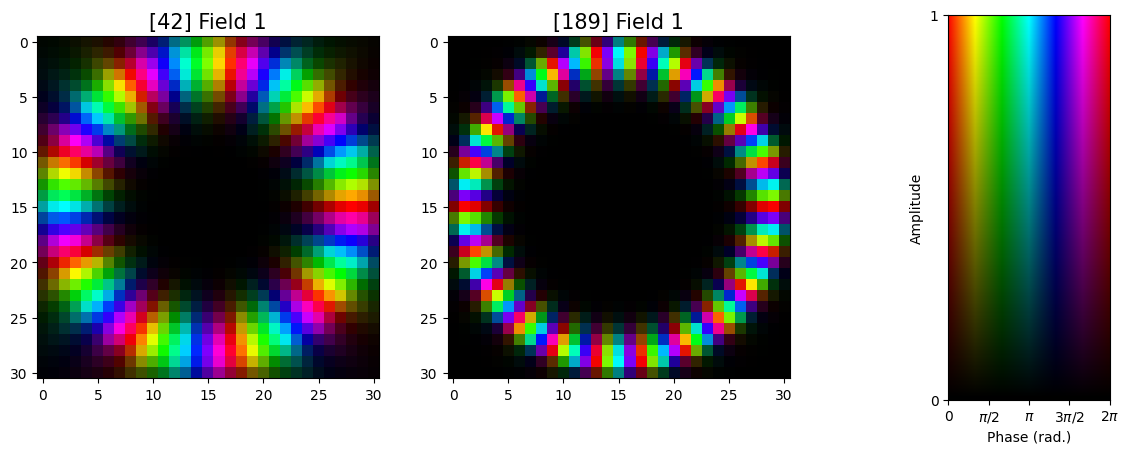

In [2]:
# Check imports and data is working correctly by plotting one of the fields
visualise2(PIMs_torch[0], PIMs_torch189[0], "", "[42] Field 1", "[189] Field 1")

## PIM Power Spectrum
Made a function "PP_Spectrum" that plots the PIM Power Spectrum triangle for easy viewing.

f:\venv code\.venv\lib\site-packages\matplotlib\colors.py:3174: RuntimeWarning: invalid value encountered in cast
  i = (h * 6.0).astype(int)


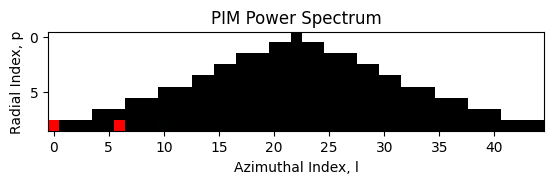

In [3]:
PP_spectrum(PIMs_torch189[9]+PIMs_torch189[0], uwlm189, PIMs_torch189)

In [4]:
def coupling_gaussian(l, p, l0, p0, sig_l, sig_p):
    """Finds the coupling gaussian on the PIM Power Spectrum."""
    return torch.exp(-(l-l0)**2/(2*sig_l**2+0.00001) - (p-p0)**2/(2*sig_p**2+0.00001))

In [5]:
# Ordered list of PIMs from uwlm
u,w,l,p = np.hsplit(uwlm189,4)
lp_list = []
for i in range(l.size):
    lp_list.append([l[i][0],p[i][0]])
lp_list[0][0]

-22.0

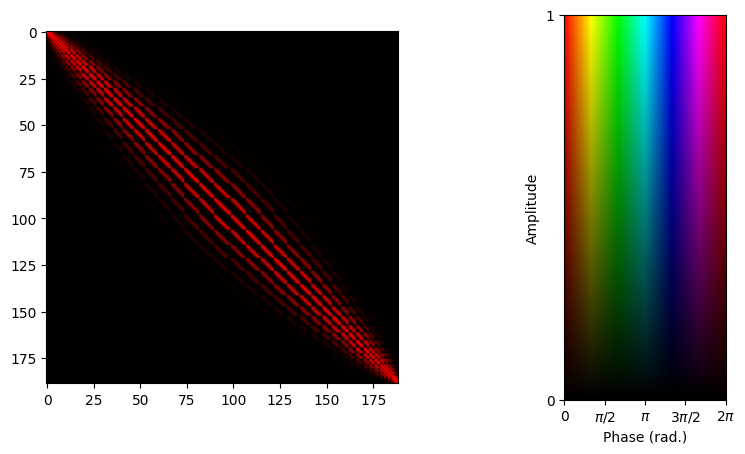

In [6]:
compressive_TM = []
for i in range(len(lp_list)):
    l0 = torch.tensor(lp_list[i][0])
    p0 = torch.tensor(lp_list[i][1])
    gauss_n = []
    for j in range(len(lp_list)):
        l = torch.tensor(lp_list[j][0])
        p = torch.tensor(lp_list[j][1])
        gauss_n.append(coupling_gaussian(l, p, l0, p0, 2, 1))
    compressive_TM.append(gauss_n)

compressive_TM = np.array(compressive_TM)
compressive_TM = torch.from_numpy(compressive_TM)

visualise(compressive_TM)

Text(0.5, 1.0, 'PIM Power Spectrum')

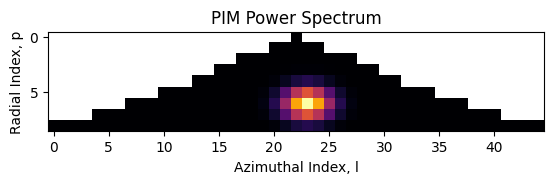

In [7]:
l0 = 1
p0 = 2
gauss_n = []
for j in range(len(lp_list)): 
    l = torch.tensor(lp_list[j][0])
    p = torch.tensor(lp_list[j][1])
    gauss_n.append(coupling_gaussian(l, p, l0, p0, 1.5, 1))

# Append values to a rectangular matrix
u,w,l,p = np.hsplit(uwlm189,4)
p_range = int(p.max() - p.min() + 1)
l_range = int(l.max() - l.min() + 1)
mat = np.zeros((p_range, l_range), dtype=np.float64)
mat[:] = np.nan

for i in range(l.shape[0]):
    i_index = int(-l[0][0]) + int(l[i,0])
    j_index = int(p[i,0])
    mat[j_index, i_index] = gauss_n[i]
mat = np.flipud(mat)

plt.imshow(mat, cmap="inferno")
plt.xlabel("Azimuthal Index, l"), plt.ylabel("Radial Index, p")
plt.title("PIM Power Spectrum")

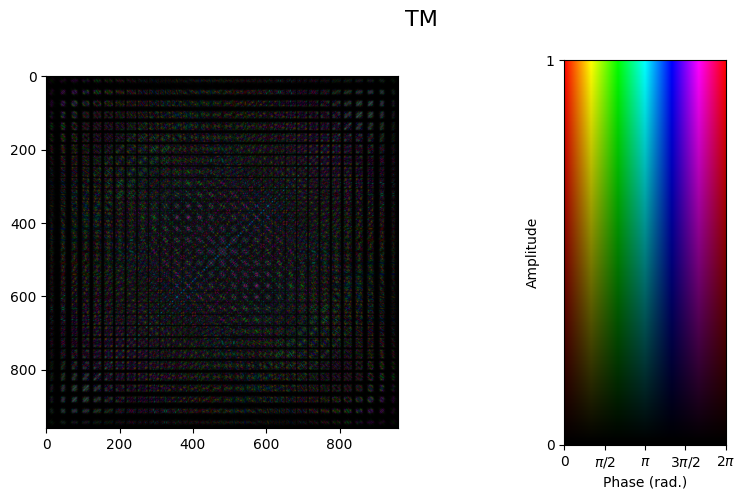

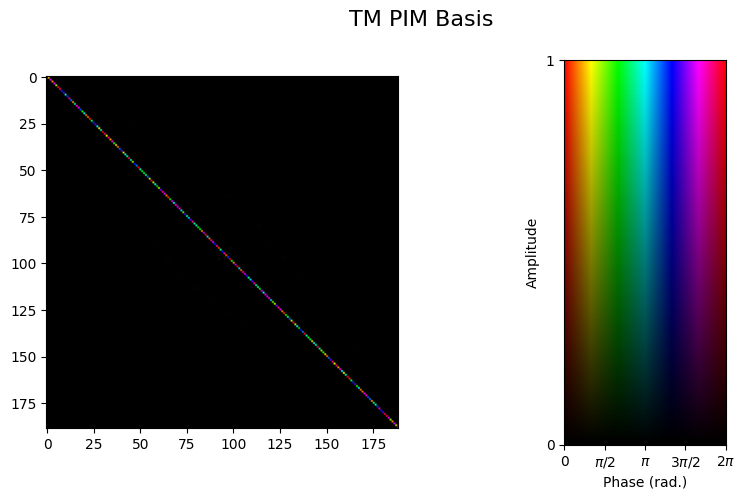

In [8]:
pim_mat = pim_matrix(PIMs_torch189)
real_mat = real_matrix(PIMs_torch189)
b_mat = beta_matrix(beta_torch189, 0.1)
bend_vec_x = vectorise(zernike_array('x',torch.tensor([0.5])))
bend_vec_y = vectorise(zernike_array('y', torch.tensor([0.3])))
bend_diag_x = torch.diag(bend_vec_x.T[0])
bend_diag_y = torch.diag(bend_vec_y.T[0])

#test_mat = (real_mat @ (b_mat @ pim_mat)) @ ((bend_diag_y @ bend_diag_x) @ (real_mat @ (b_mat @ pim_mat)))
test_mat = (real_mat @ (b_mat @ pim_mat)) @ (real_mat @ (b_mat @ pim_mat))
visualise(test_mat, "TM")

# TM in PIM basis
test_pim_mat = pim_mat @ test_mat @ real_mat
visualise(test_pim_mat, "TM PIM Basis")

In [ ]:
def pim_superposition(n, pims=PIMs_torch, random=True):
    """Generates a field of n pims superposed on top of eachother. Can choose random pims, or the first n."""
    # Make a field of zero values with same shape as PIM fields
    field = pims[0] - pims[0]

    # Superposition
    if random == 1:
        used_pims = []
        for i in range(n):
            index = random.randint(0,pims.shape[0]-1)
            if index in used_pims:
                
            field += pims[index]
    
    else:
        field += pims[i]
    

In [35]:
random.randint(0,PIMs_torch.shape[0]-1)

4

In [38]:
l = [1,2,3]

if 4 in l:
    print("yes")
else:
    print("no")

no
